# **YOLOv8 Custom Object detection:**

`Ultralytics YOLOv8` is a cutting-edge, state-of-the-art (SOTA) model that builds upon the success of previous YOLO versions and introduces new features and improvements to further boost performance and flexibility. YOLOv8 is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and tracking, instance segmentation, image classification and pose estimation tasks. (*More : https://github.com/ultralytics/ultralytics*)



All libraries on data: `23.05.2023` . They are still **under heavy development.**

**Running GPU and check it:**

In [21]:
!nvidia-smi

Tue May 23 14:36:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     8W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Installing the YOLOv8:**

In [22]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


**Importing some neccessary files.**

In [23]:
from ultralytics import YOLO
from IPython.display import display, Image

# **Custom Training:**

**Connect my Google Drive to Google Colab**

In [24]:
 from google.colab import drive
 drive.mount('/content/drive') # to bring my data, I have to connect to my drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
%cd /content/drive/MyDrive/YOLOv8 data # go to the dataset file in drive

[Errno 2] No such file or directory: '/content/drive/MyDrive/YOLOv8 data # go to the dataset file in drive'
/content/drive/MyDrive/YOLOv8 data/runs/detect/train


In [26]:
!ls # checking the files inside of YOLOv8 file

args.yaml					    R_curve.png
confusion_matrix_normalized.png			    results.csv
confusion_matrix.png				    results.png
data						    runs
events.out.tfevents.1684851259.f3a4b9404db8.7981.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
labels_correlogram.jpg				    train_batch2.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    weights


take **'.yaml'** file ouside of img. files and change the path of them, bcz **'.yaml'** will check each `train and val. `images one by one. Then start train set...

In [36]:
%cd ../..


/content/drive/MyDrive/YOLOv8 data


In [38]:
!yolo task = detect mode = train model = yolov8s.pt data = data.yaml epochs = 30 imgsz = 224 plots = True

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=30, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=

After the running the **train set**, the `runs `file automatically creates and all my files will be saved in it.

In [39]:
!ls # check my files after train set

data  data.yaml  runs  yolov8n.pt  yolov8s.pt


In [42]:
%ls # check all new files in 'run'folder

data/  data.yaml  runs/  yolov8n.pt  yolov8s.pt


**Illustrate with Matrix Plots**

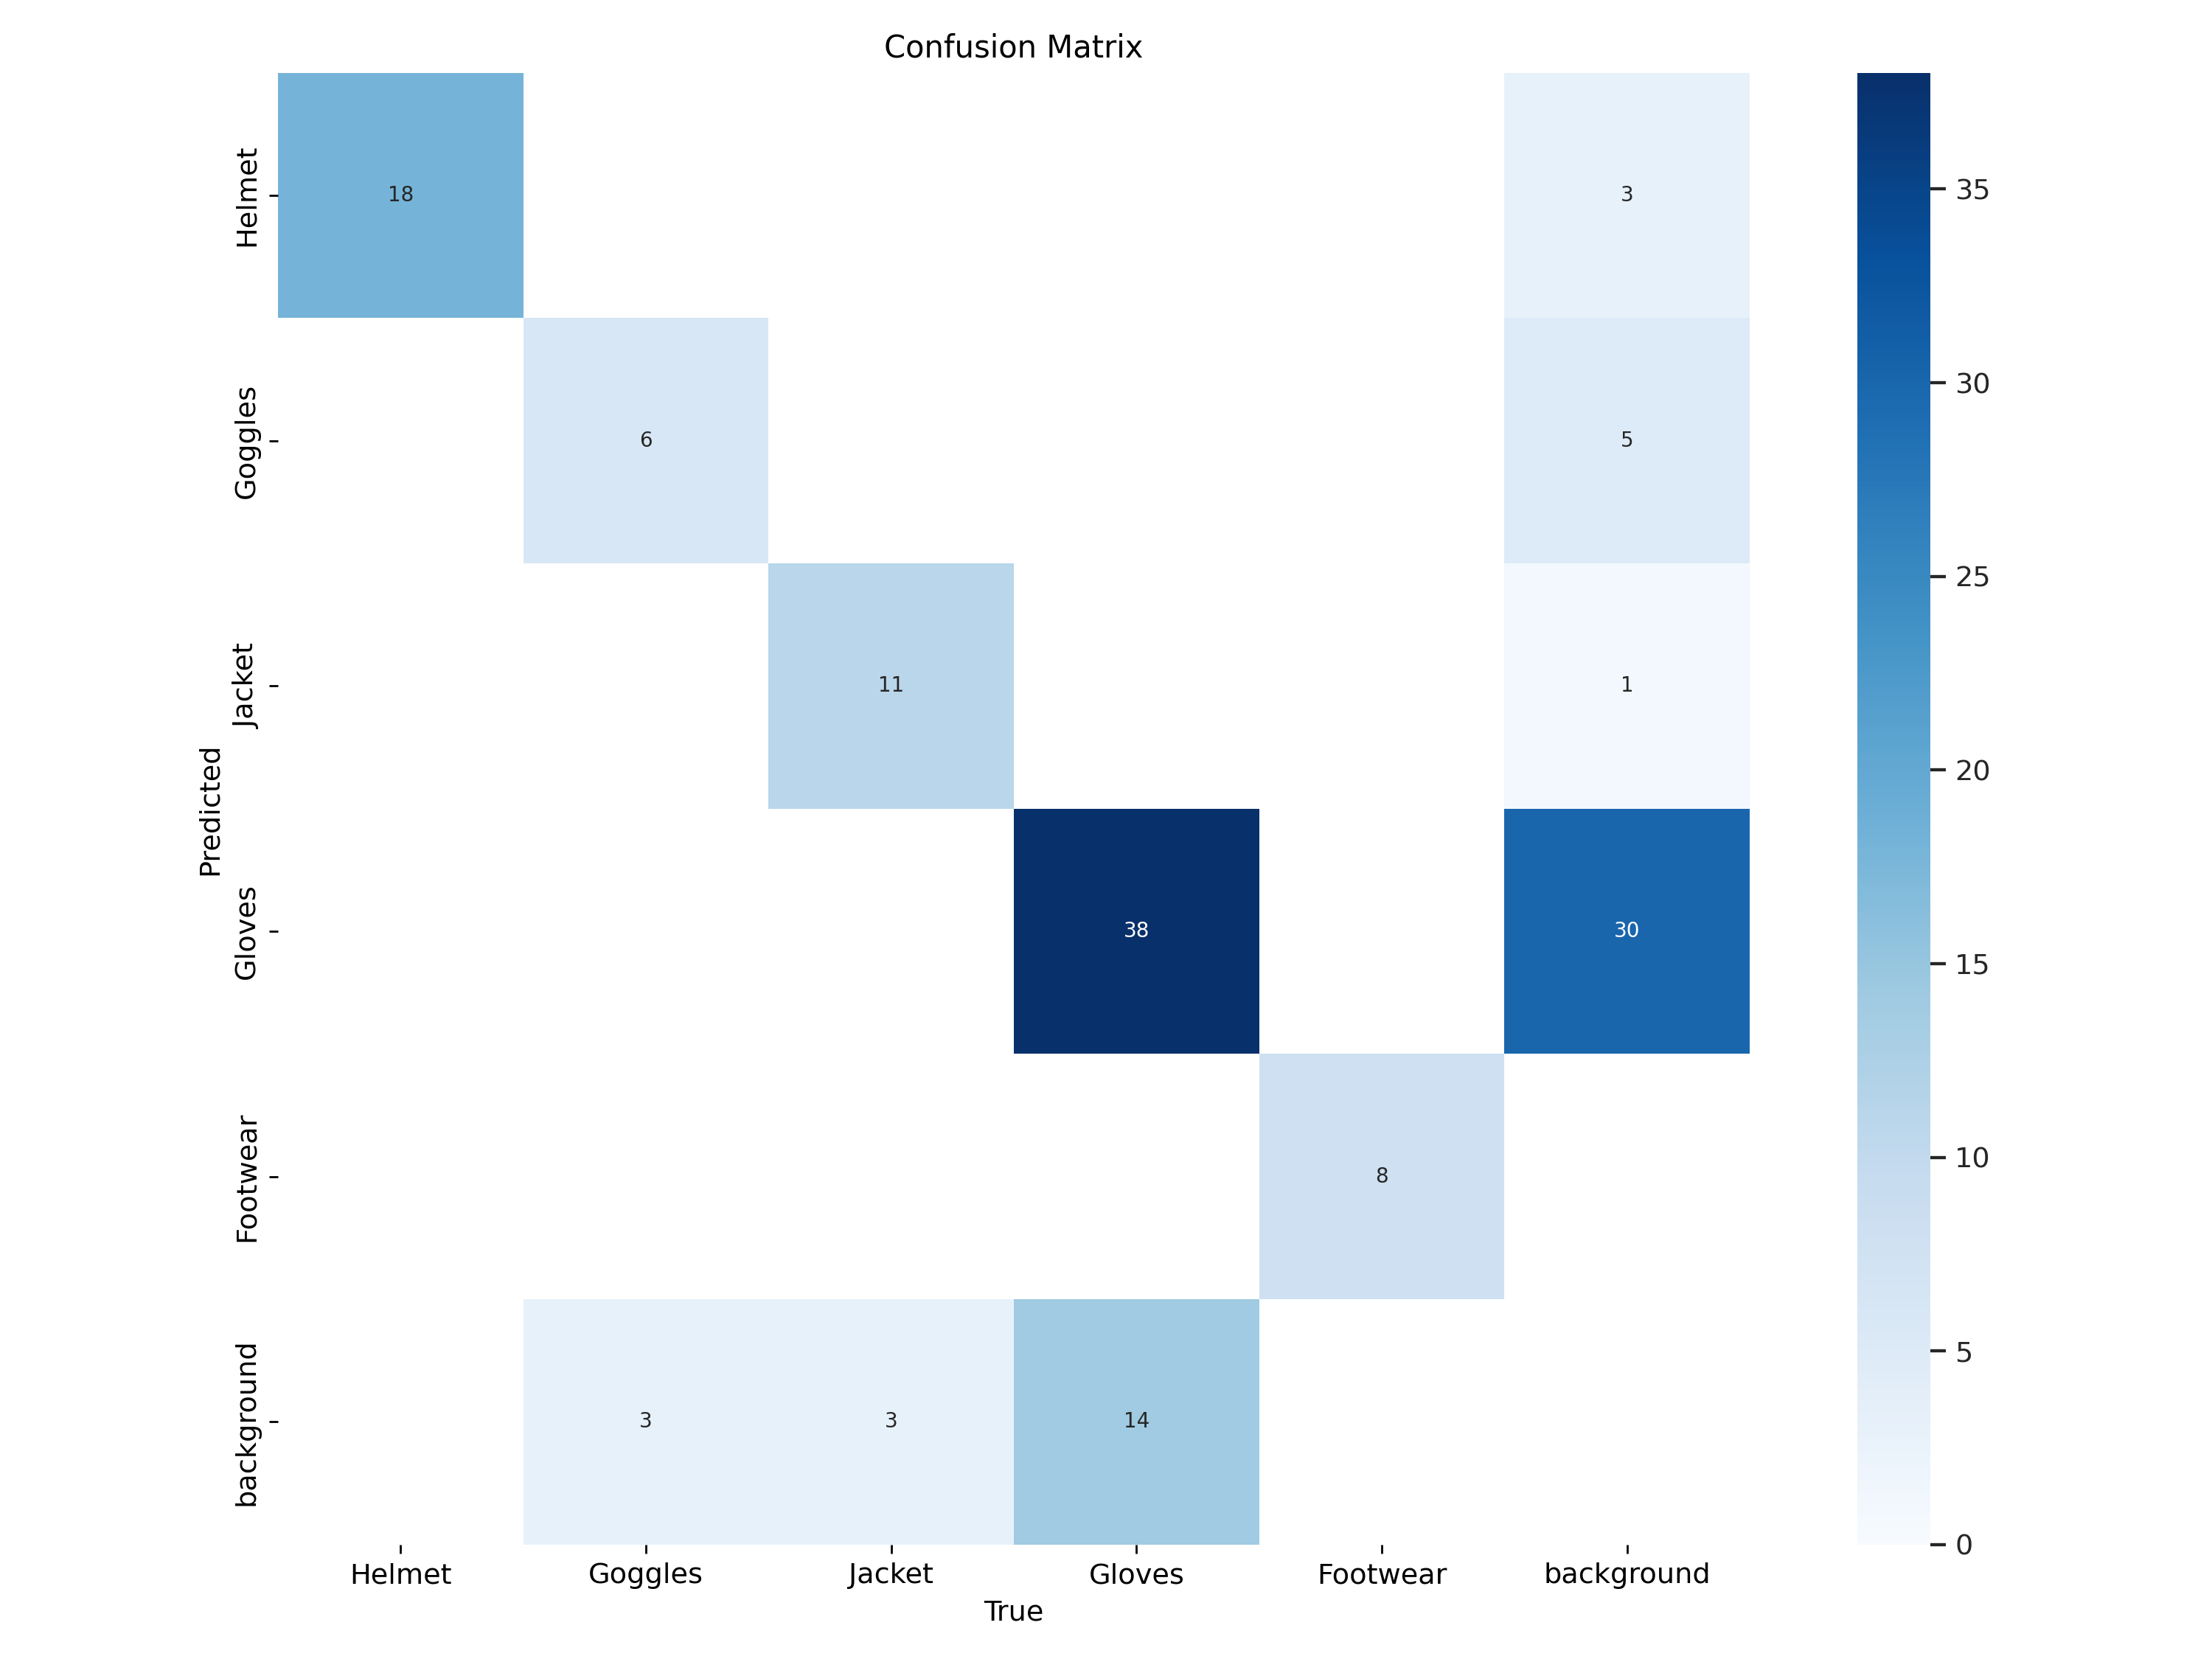

In [43]:
Image(filename = '/content/drive/MyDrive/YOLOv8 data/runs/detect/train/confusion_matrix.png', width = 800, height = 500)

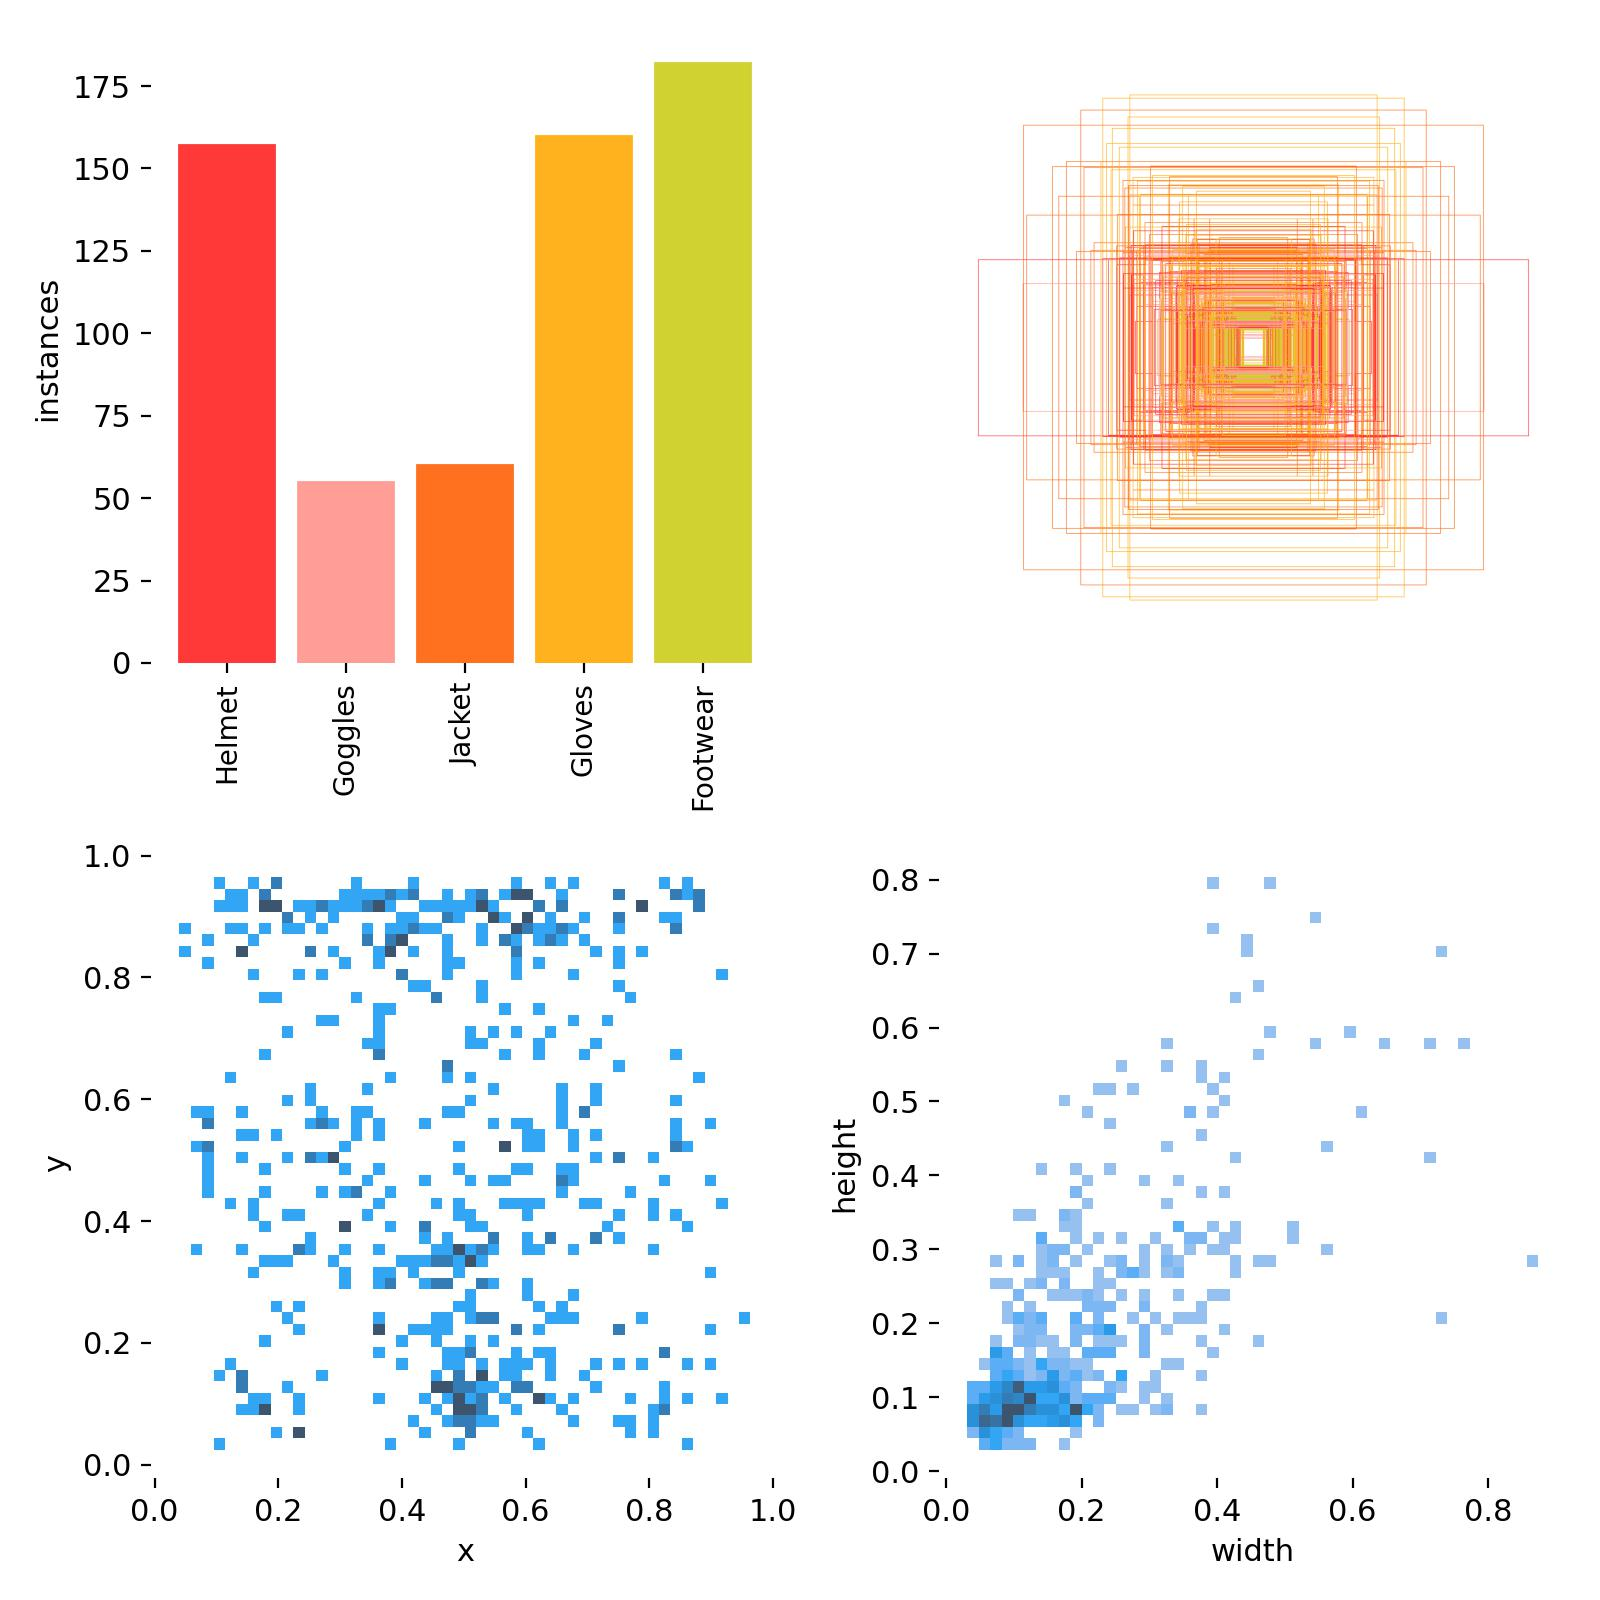

In [44]:
Image(filename = '/content/drive/MyDrive/YOLOv8 data/runs/detect/train/labels.jpg', width = 800, height = 500)

# **Validation step by using Train set**

In [52]:
%cd /content/drive/MyDrive/YOLOv8 data

/content/drive/MyDrive/YOLOv8 data


In [54]:
!yolo task = detect mode = val model = runs/detect/train3/weights/best.pt data = data.yaml 

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/YOLOv8 data/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.49it/s]
                   all         31        101      0.887      0.772      0.842      0.516
                Helmet         31         18        0.9          1      0.995      0.683
               Goggles         31          9      0.831      0.556       0.68      0.391
                Jacket         31         14      0.935      0.786      0.868      0.668
                Gloves         31         52      0.786      0.519      0.673      0.357
              Footwear         31          8      0.982          1      0.995      0.481
Speed: 0.9ms preprocess, 19.1ms inference, 0.

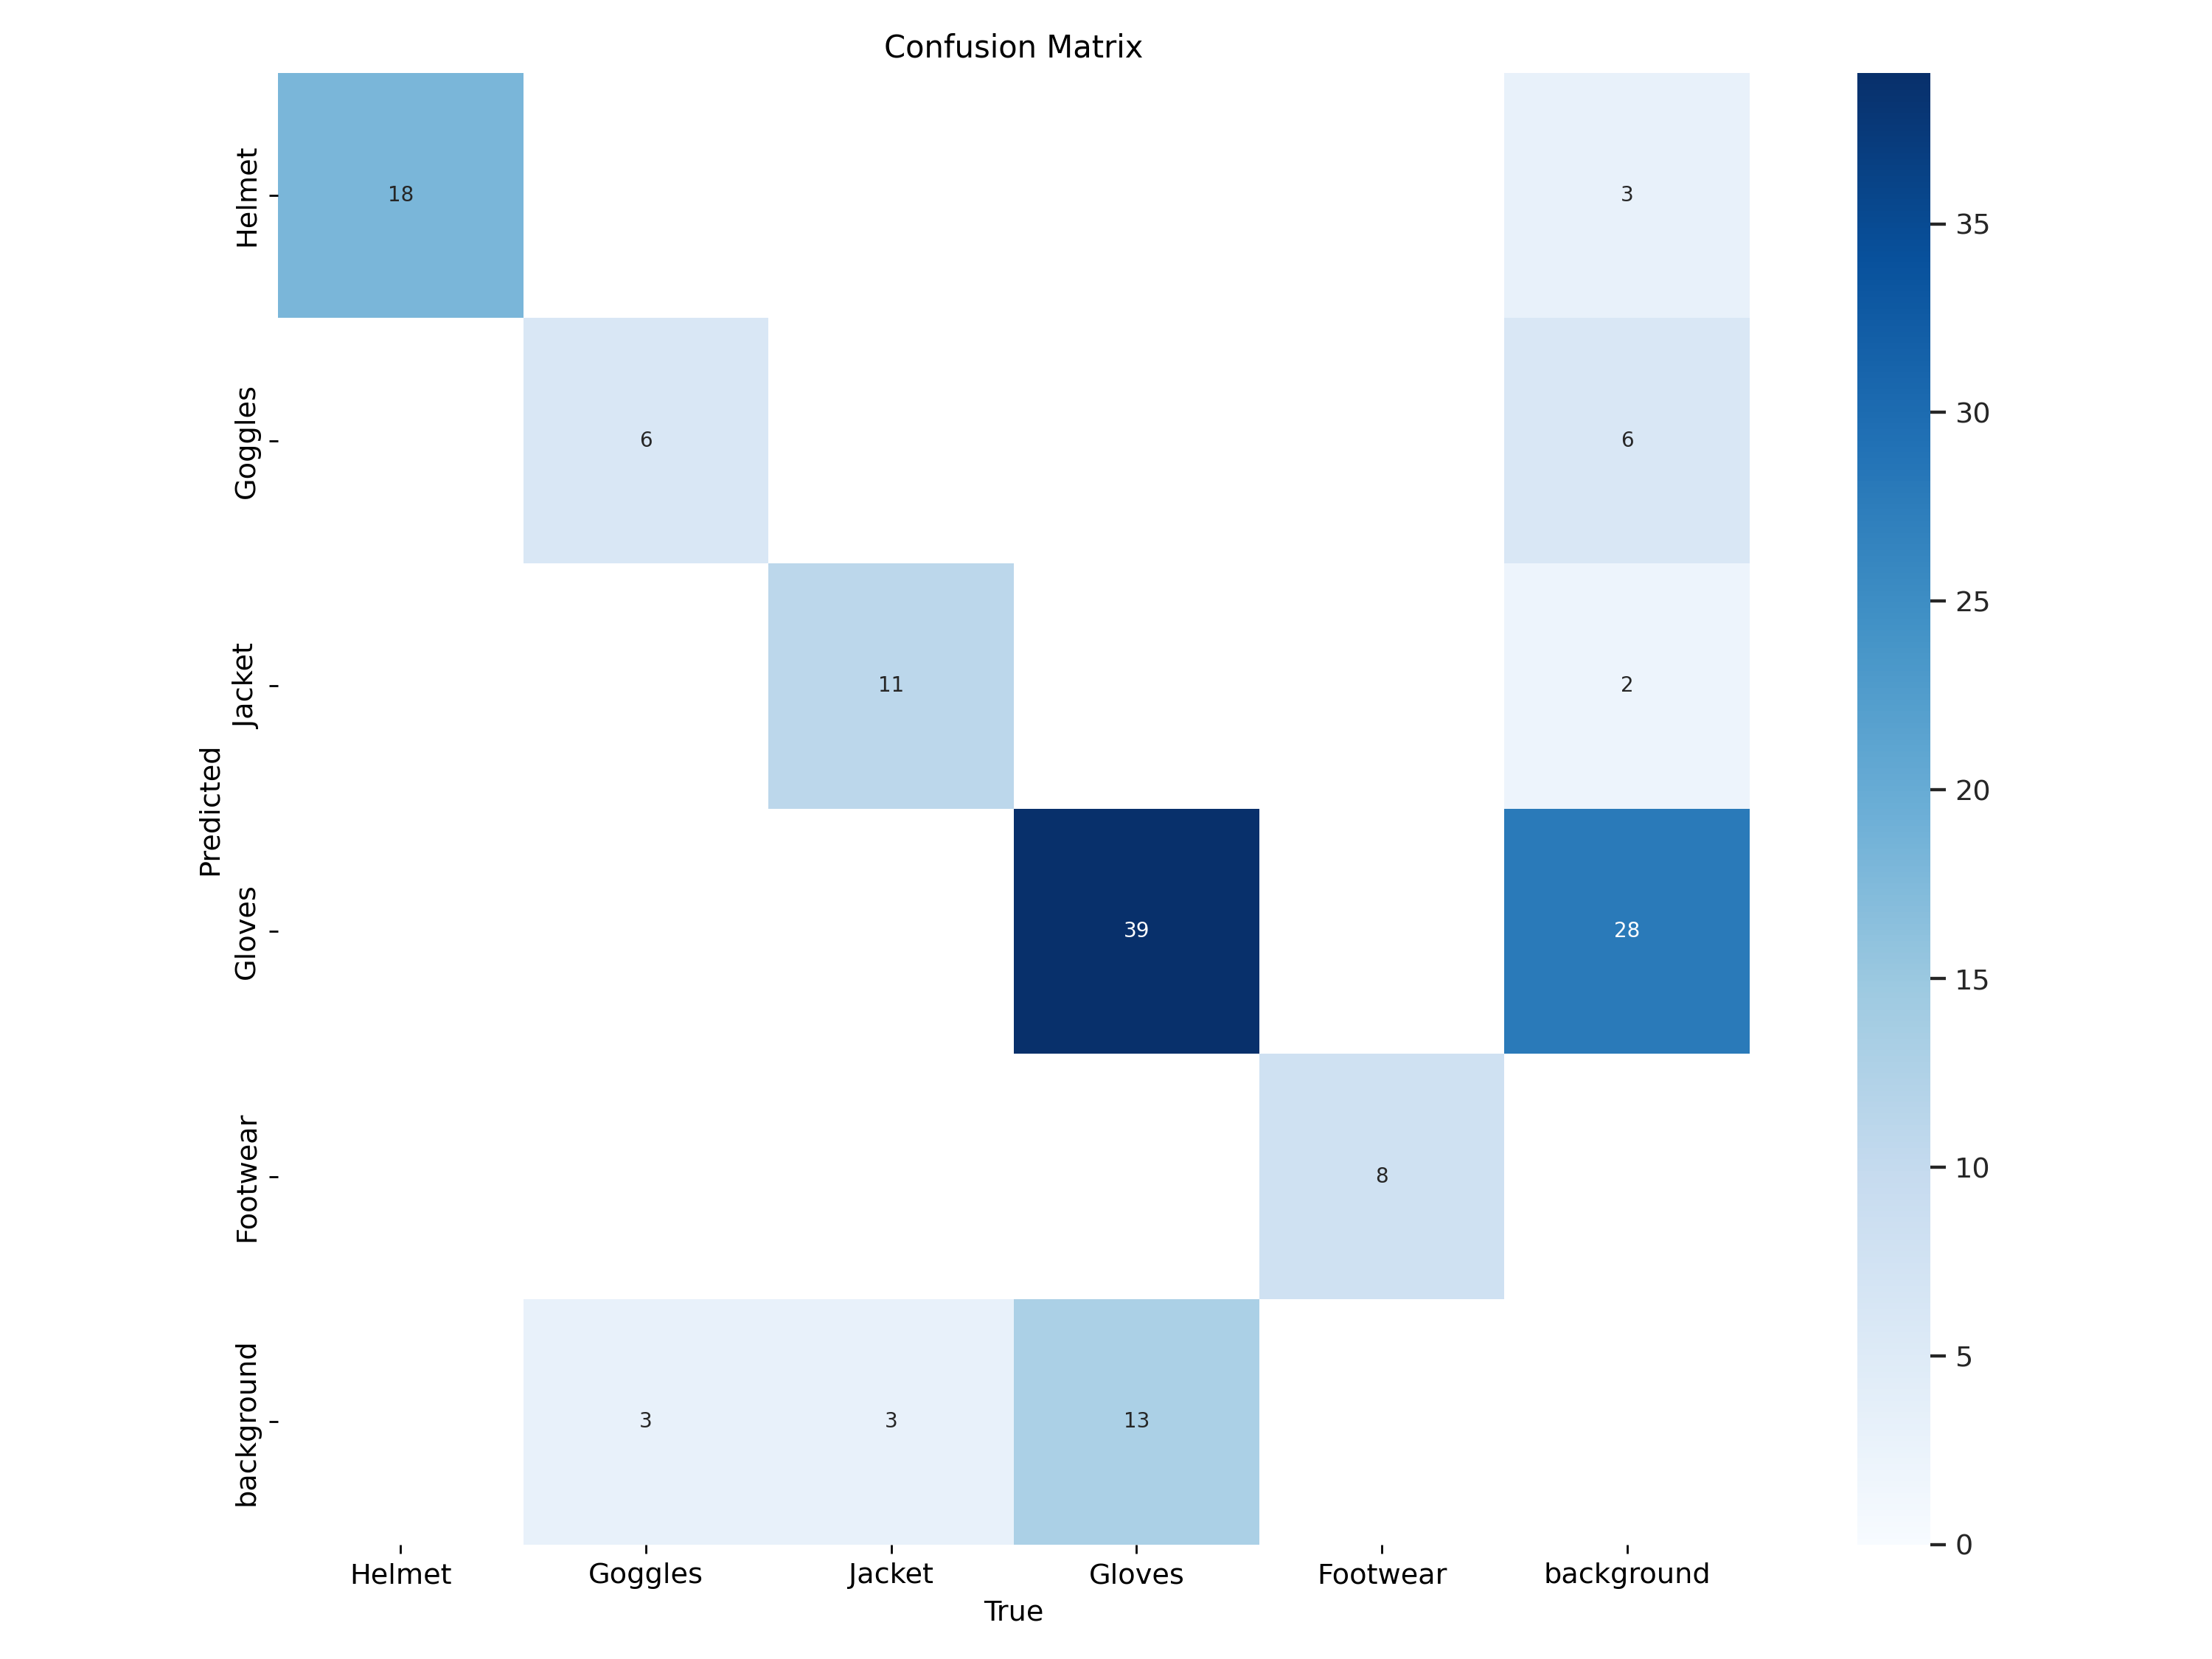

In [55]:
Image(filename = '/content/drive/MyDrive/YOLOv8 data/runs/detect/val/confusion_matrix.png', width = 800, height = 500)


# **INFERENCE with Custom Model**

In [58]:
%cd /content/drive/MyDrive/YOLOv8 data

/content/drive/MyDrive/YOLOv8 data


In [61]:
!yolo task = detect mode = predict model = runs/detect/train3/weights/best.pt conf = 0.25 source = data/test/images

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients

image 1/31 /content/drive/MyDrive/YOLOv8 data/data/test/images/1.jpeg: 192x224 2 Helmets, 2 Goggless, 3 Glovess, 60.5ms
image 2/31 /content/drive/MyDrive/YOLOv8 data/data/test/images/10.jpeg: 160x224 5 Glovess, 88.0ms
image 3/31 /content/drive/MyDrive/YOLOv8 data/data/test/images/11.jpeg: 224x224 2 Glovess, 10.7ms
image 4/31 /content/drive/MyDrive/YOLOv8 data/data/test/images/12.jpeg: 192x224 3 Glovess, 9.3ms
image 5/31 /content/drive/MyDrive/YOLOv8 data/data/test/images/13.jpeg: 128x224 2 Glovess, 99.8ms
image 6/31 /content/drive/MyDrive/YOLOv8 data/data/test/images/14(1).jpeg: 224x224 (no detections), 9.2ms
image 7/31 /content/drive/MyDrive/YOLOv8 data/data/test/images/14.jpg: 192x224 2 Helmets, 1 Goggles, 1 Gloves, 8.7ms
image 8/31 /content/drive/MyDrive/YOLOv8 data/data/test/images/15.jpeg: 224x224 1 Jacket, 8.5ms
image 9/31 /c

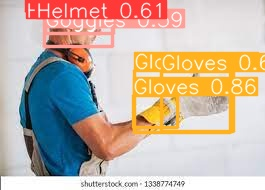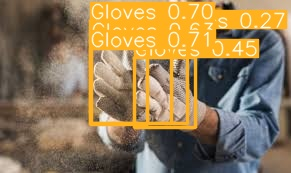

# **Check more Results:**

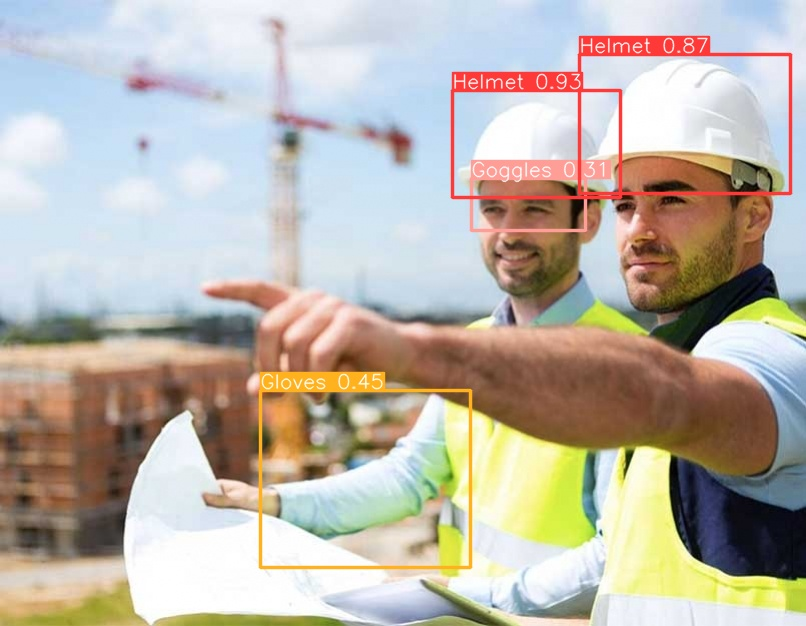

In [65]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:4]:
  display(Image(filename = image_path, width = 500))
  print('\n')

**USED RESOURCES:** [`VIDEO`](https://https://www.youtube.com/watch?v=iy34dSwfEsY)   [`WEBSITE`](https://learnopencv.com/train-yolov8-on-custom-dataset/#The-Pothole-Detection-Dataset-to-Train-YOLOv8) 

URINOV AZIZBEK 24.05.2023 

(YOLOv8 Custom Dataset Object Detection)